A retail store wants to identify customers who make frequent purchases. Given the dataset below, write a code to:
1.	Group customers by their IDs.
2.	Calculate the total number of purchases per customer.
3.	Identify the top 3 frequent customers.
Dataset:
data = {'Customer_ID': [101, 102, 103, 101, 104, 102, 101, 105, 102, 103],
        'Purchase_Amount': [200, 150, 180, 220, 300, 200, 100, 400, 250, 300]}


In [ ]:
import pandas as pd
data = {'Customer_ID': [101, 102, 103, 101, 104, 102, 101, 105, 102, 103],
        'Purchase_Amount': [200, 150, 180, 220, 300, 200, 100, 400, 250, 300]}
df=pd.DataFrame(data)
total_purchase=df.groupby("Customer_ID")["Purchase_Amount"].sum().reset_index()
print(f"Total Purchases per Customer:\n {total_purchase}")
top=total_purchase.sort_values("Purchase_Amount",ascending=False).head(3)
print(f"Top 3 Frequent Customers:\n {top}")

A company tracks the daily sales of a product over a month. You are tasked with identifying any abnormal sales data using the IQR (Interquartile Range) method.
Dataset (Daily Sales in Units):

data = {'Day': range(1, 31),
        'Sales': [25, 30, 28, 45, 55, 60, 22, 80, 95, 120,
                  33, 29, 27, 35, 40, 50, 85, 110, 105, 92,
                  30, 34, 31, 33, 36, 42, 44, 48, 90, 200]}

Tasks:
1. Calculate the Q1 (25th percentile) and Q3 (75th percentile).
2. Determine the IQR.
3. Identify the Lower Bound and Upper Bound.
4. Detect and display the outliers.
5. Replace the Outliers with the Median Value.
Expected Output:
Q1: 31.5, Q3: 83.75, IQR: 52.25
Lower Bound: -46.875, Upper Bound: 162.125
Outliers Detected:
    Day  Sales
29   30    200
Data After Replacing Outliers with Median:
    Day  Sales
0     1   25.0
1     2   30.0
2     3   28.0
3     4   45.0
4     5   55.0
5     6   60.0
6     7   22.0
7     8   80.0
8     9   95.0
9    10  120.0
10   11   33.0
11   12   29.0
12   13   27.0
13   14   35.0
14   15   40.0
15   16   50.0
16   17   85.0
17   18  110.0
18   19  105.0
19   20   92.0
20   21   30.0
21   22   34.0
22   23   31.0
23   24   33.0
24   25   36.0
25   26   42.0
26   27   44.0
27   28   48.0
28   29   90.0
29   30   43.0

In [ ]:
import pandas as pd
import numpy as np
data = {'Day': range(1, 31),
        'Sales': [25, 30, 28, 45, 55, 60, 22, 80, 95, 120,
                  33, 29, 27, 35, 40, 50, 85, 110, 105, 92,
                  30, 34, 31, 33, 36, 42, 44, 48, 90, 200]}
df=pd.DataFrame(data)
q1,q3=np.percentile(df['Sales'],[25,75])
IQR=q3-q1
lower_bound=q1-1.5*IQR
upper_bound=q3+1.5*IQR
print(f"Q1:{q1},Q3:{q3},IQR:{IQR}")
print(f"Lower Bound: {lower_bound},Upper Bound:{upper_bound}")
outliers=df[(df['Sales']<lower_bound) | (df['Sales']>upper_bound)]
print("Outliers Detected:\n",outliers)
median_value=df["Sales"].median()
df['Sales']=np.where((df['Sales']<lower_bound) | (df['Sales']>upper_bound),median_value,df["Sales"])
print(f"Data After Replacing Outliers with Median\n {df}")

Question 3:
 
A pharmaceutical company is testing the effectiveness of a new drug to reduce blood pressure. Two groups of patients were selected:
Group 1 (Treatment): Received the drug
Group 2 (Control): Received a placebo
The company wants to check if there is a significant difference in the blood pressure levels between the two groups using an Independent T-Test.
Dataset:
data = {'Group': ['Treatment']*10 + ['Control']*10,
        'Blood_Pressure': [120, 115, 118, 123, 122, 119, 124, 117, 116, 121,
                            130, 135, 140, 138, 142, 136, 139, 134, 137, 141]}
Tasks:
1.	Perform an Independent T-Test.
2.	State the null and alternative hypotheses.
3.	Calculate the p-value.
4.	Conclude whether the drug has a significant effect.
Expected Output:
T-Statistic: -11.870553692962726
P-Value: 6.008066605173374e-10
Reject the Null Hypothesis: The drug has a significant effect.

In [ ]:
import pandas as pd
data = {'Group': ['Treatment']*10 + ['Control']*10,
        'Blood_Pressure': [120, 115, 118, 123, 122, 119, 124, 117, 116, 121,
                            130, 135, 140, 138, 142, 136, 139, 134, 137, 141]}
df=pd.DataFrame(data)
from scipy.stats import ttest_ind
treatment=df[df['Group']=='Treatment']['Blood_Pressure']
control=df[df['Group']=='Control']['Blood_Pressure']
t_stat,p=ttest_ind(treatment,control)
print(f"T-Statistic:{t_stat}\nP-Value:{p}")
if p<0.05:
    print("Reject the Null Hypothesis: The drug has a significant effect.")
else:
    print("Fail to reject the Null Hypothesis: The drug has a no significant effect.")


In [ ]:
data={"Region":["North","South","East","West","Central"],
      "TV_Ad_Budget":[200,300,400,500,600],
      "Social_Media_Budget":[150,250,300,450,500],
      "Sales":[20,35,50,60,80]}
df=pd.DataFrame(data)
cov_tv=df[["TV_Ad_Budget","Sales"]].cov().iloc[0,1]
cov_social=df[["Social_Media_Budget","Sales"]].cov().iloc[0,1]
cor_tv=df[["TV_Ad_Budget","Sales"]].corr().iloc[0,1]
cor_social=df[["Social_Media_Budget","Sales"]].corr().iloc[0,1]
print(f"Covariance (TV vs Sales):{cov_tv}")
print(f"Covariance (Social Media vs Sales): {cov_social}")
print(f"Correlation (TV vs Sales):{cor_tv}")
print(f"Correlation (Social Media vs Sales):{cor_social}")
if cor_tv > cor_social:
    print("TV Ads have a stronger impact on Sales.")
else:
    print("Social Media Ads have a stronger impact on Sales.")

In [39]:
import pandas as pd
import numpy as np
data=[25, 30, 28, 45, 55, 60, 22, 80, 95, 120, 33, 29, 27, 35, 40, 50, 85, 110, 105, 92, 30, 34, 31, 33, 36, 42, 44, 48, 90, 200, 20, 25, 27, 32, 38, 41, 47, 58, 62, 77, 80, 84, 90, 110, 123, 145, 150, 160]
df=pd.DataFrame(data,columns=["Delivery_Time"])
print(f"Mean Delivery Time:{df.mean()[0]}")
print(f"Standard Deviation of Delivery Time:{df.std()[0]}")
mu=df.mean()[0]
si=df.std()[0]

Mean Delivery Time:65.0625
Standard Deviation of Delivery Time:42.159982160156105


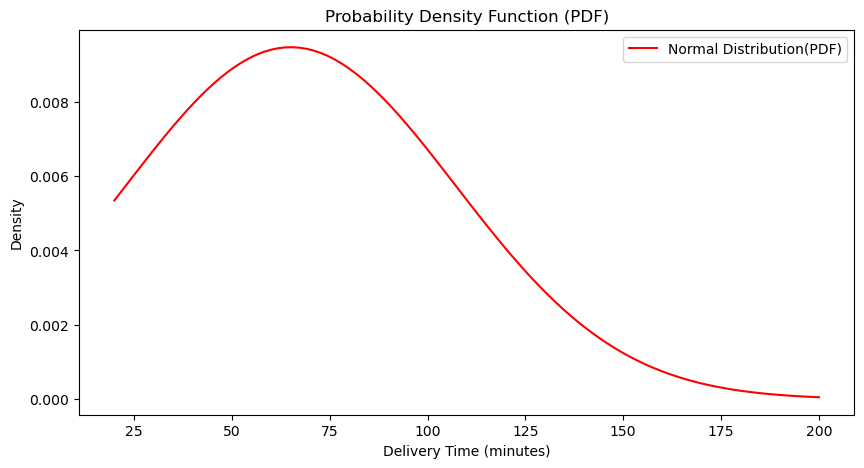

In [41]:
from scipy.stats import norm
import matplotlib.pyplot as plt
x=np.linspace(df["Delivery_Time"].min(),df["Delivery_Time"].max(),100)
pdf=norm.pdf(x,mu,si)
plt.figure(figsize=(10,5))
plt.plot(x,pdf,'r-',label='Normal Distribution(PDF)')
plt.xlabel("Delivery Time (minutes)")
plt.ylabel("Density")
plt.title("Probability Density Function (PDF)")
plt.legend()
plt.show()

In [37]:
import warnings
warnings.filterwarnings('ignore')